In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import nltk
import pandas as pd
import re
import string
from nltk.stem import WordNetLemmatizer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
from nltk.stem import WordNetLemmatizer

%matplotlib inline

In [3]:
#reading the dataset
dataset = pd.read_csv(r"/content/drive/MyDrive/NLP - Assignment/datasets/Restaurant_Reviews 3.tsv", delimiter = '\t', quoting = 3)

In [4]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
print("Shape of the dataset:", dataset.shape)

Shape of the dataset: (1000, 2)


## Text Preprocessing/Transformation

**Convert each word into its lower case**

In [5]:

# Function to convert text to lowercase
def preprocess_text(text):
    return text.lower()

# Applying the function to the 'review' column
dataset['Review'] = dataset['Review'].apply(preprocess_text)

# Display the updated DataFrame
print(dataset.head())

                                              Review  Liked
0                           wow... loved this place.      1
1                                 crust is not good.      0
2          not tasty and the texture was just nasty.      0
3  stopped by during the late may bank holiday of...      1
4  the selection on the menu was great and so wer...      1


**Removing Numbers**

In [6]:
# Function to remove numbers from text
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

# Apply the function to the 'review' column
dataset['Review'] = dataset['Review'].apply(remove_numbers)

# Display the updated DataFrame
print(dataset.head())

                                              Review  Liked
0                           wow... loved this place.      1
1                                 crust is not good.      0
2          not tasty and the texture was just nasty.      0
3  stopped by during the late may bank holiday of...      1
4  the selection on the menu was great and so wer...      1


**Remove Puncuation**

In [7]:
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

# Apply the function to the 'review' column
dataset['Review'] = dataset['Review'].apply(remove_punctuation)

# Display the updated DataFrame
print(dataset.head())

                                              Review  Liked
0                               wow loved this place      1
1                                  crust is not good      0
2           not tasty and the texture was just nasty      0
3  stopped by during the late may bank holiday of...      1
4  the selection on the menu was great and so wer...      1


**Removing Stopwords**

In [8]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK stopwords (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    filtered_text = [word for word in word_tokens if word.lower() not in stop_words]
    return ' '.join(filtered_text)

# Apply the function to the 'review' column
dataset['Review'] = dataset['Review'].apply(remove_stopwords)

# Display the updated DataFrame
print(dataset.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                              Review  Liked
0                                    wow loved place      1
1                                         crust good      0
2                                tasty texture nasty      0
3  stopped late may bank holiday rick steve recom...      1
4                        selection menu great prices      1


**Word Lemmatization**

In [9]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources (if not already downloaded)
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    word_tokens = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in word_tokens]
    return ' '.join(lemmatized_words)

# Apply the lemmatization function to the 'review_text' column
dataset['review_text_lemmatized'] = dataset['Review'].apply(lemmatize_text)

# Display the updated DataFrame
print(dataset[['Review', 'review_text_lemmatized']])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


                                                Review  \
0                                      wow loved place   
1                                           crust good   
2                                  tasty texture nasty   
3    stopped late may bank holiday rick steve recom...   
4                          selection menu great prices   
..                                                 ...   
995                  think food flavor texture lacking   
996                            appetite instantly gone   
997                    overall impressed would go back   
998  whole experience underwhelming think well go n...   
999  hadnt wasted enough life poured salt wound dra...   

                                review_text_lemmatized  
0                                      wow loved place  
1                                           crust good  
2                                  tasty texture nasty  
3    stopped late may bank holiday rick steve recom...  
4                 

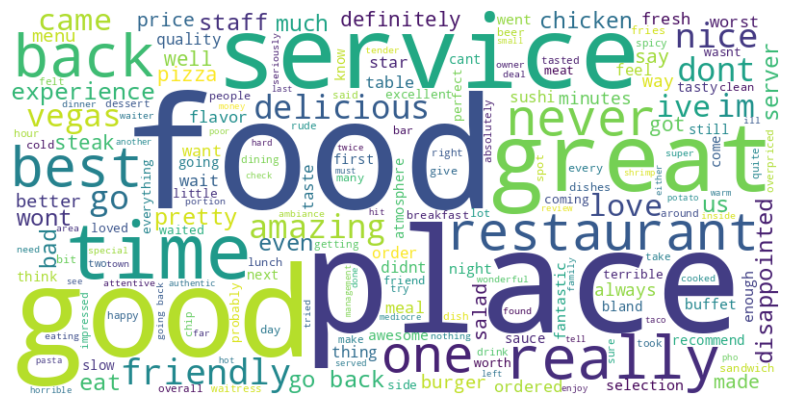

In [10]:
all_reviews = ' '.join(dataset['Review'].astype(str))

# Generate WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Text Representation

**Bag of Words (BoW) using CountVectorizer**

In [11]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
vectorizer = CountVectorizer()

# Fit and transform the 'review_text' column
bow_matrix = vectorizer.fit_transform(dataset['Review'])

# Convert the matrix to a DataFrame for better understanding
bow_dataset = pd.DataFrame(bow_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the BoW DataFrame
print(bow_dataset.head())

   absolute  absolutely  absolutley  accident  accommodations  accomodate  \
0         0           0           0         0               0           0   
1         0           0           0         0               0           0   
2         0           0           0         0               0           0   
3         0           0           0         0               0           0   
4         0           0           0         0               0           0   

   accordingly  accountant  ache  acknowledged  ...  yelpers  yet  youd  \
0            0           0     0             0  ...        0    0     0   
1            0           0     0             0  ...        0    0     0   
2            0           0     0             0  ...        0    0     0   
3            0           0     0             0  ...        0    0     0   
4            0           0     0             0  ...        0    0     0   

   youll  youre  yucky  yukon  yum  yummy  zero  
0      0      0      0      0    0  

**Term Frequency-Inverse Document Frequency (TF-IDF)**

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Instantiate the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'review_text' column
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset['Review'])

# Convert the matrix to a DataFrame for better understanding
tfidf_dataset = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_dataset.head())

   absolute  absolutely  absolutley  accident  accommodations  accomodate  \
0       0.0         0.0         0.0       0.0             0.0         0.0   
1       0.0         0.0         0.0       0.0             0.0         0.0   
2       0.0         0.0         0.0       0.0             0.0         0.0   
3       0.0         0.0         0.0       0.0             0.0         0.0   
4       0.0         0.0         0.0       0.0             0.0         0.0   

   accordingly  accountant  ache  acknowledged  ...  yelpers  yet  youd  \
0          0.0         0.0   0.0           0.0  ...      0.0  0.0   0.0   
1          0.0         0.0   0.0           0.0  ...      0.0  0.0   0.0   
2          0.0         0.0   0.0           0.0  ...      0.0  0.0   0.0   
3          0.0         0.0   0.0           0.0  ...      0.0  0.0   0.0   
4          0.0         0.0   0.0           0.0  ...      0.0  0.0   0.0   

   youll  youre  yucky  yukon  yum  yummy  zero  
0    0.0    0.0    0.0    0.0  0.0  


**Word Embeddings using Word2Vec**

In [17]:
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
#import nltk
#nltk.download('punkt')

# Tokenize the sentences into words
tokenized_reviews = [word_tokenize(review.lower()) for review in dataset['Review']]

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=tokenized_reviews, vector_size=100, window=5, min_count=1, workers=4)

# Get the Word Embedding for a specific word ('delicious')
embedding_delicious = word2vec_model.wv['delicious']
print(f"Word Embedding for 'delicious': {embedding_delicious}")

Word Embedding for 'delicious': [ 2.0432719e-03  1.5110875e-03 -2.5711718e-03  9.7361887e-03
  3.0022098e-03  2.1792999e-03 -9.9534506e-04  3.0185878e-03
  5.5753211e-03 -1.4427796e-03  3.2894001e-03 -1.9935595e-03
  5.0418610e-03  3.8493308e-03  3.2700207e-03 -5.9542321e-03
 -4.6543917e-03  3.1765767e-03 -5.6938874e-03 -1.7351614e-03
 -1.2056603e-05  3.8826754e-03 -7.8570638e-03  8.2729086e-03
 -1.4620853e-03 -5.4749488e-03  3.2883387e-03 -2.5758918e-03
 -8.6399028e-03 -4.4487510e-03  8.3576125e-04 -9.0063047e-03
  6.9217809e-04  2.0634711e-03 -3.3853468e-03  3.8573728e-03
  2.4935405e-03  9.0862643e-03  1.2093073e-03 -2.6134917e-04
  2.5784357e-03 -3.1135727e-03 -9.0901796e-03  8.3926013e-03
 -9.5718785e-04 -1.0469124e-02 -7.6326770e-03 -4.1124811e-03
  4.4539841e-03  5.4147770e-03  6.4877262e-03 -7.6087802e-03
  3.2745191e-04 -2.7883132e-03 -5.6247045e-03  7.5482982e-03
  4.3096403e-03 -3.2510853e-03 -9.0959379e-03 -4.5597912e-03
 -5.1872729e-04  8.1081241e-03  5.9373095e-03 -8.5275

**Named Entity Recognition**

In [18]:
import spacy
nlp = spacy.load("en_core_web_sm")


# Function for Named Entity Recognition
def ner_extraction(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    return entities

# Apply the NER function to the 'review_text' column
dataset['named_entities'] = dataset['Review'].apply(ner_extraction)

# Display the DataFrame with named entities
print(dataset[['Review', 'named_entities']].head())

                                              Review          named_entities
0                                    wow loved place                      []
1                                         crust good                      []
2                                tasty texture nasty                      []
3  stopped late may bank holiday rick steve recom...  [(rick steve, PERSON)]
4                        selection menu great prices                      []


## Text Classification

**Naive Bayes**

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [20]:
X_train, X_test, y_train, y_test = train_test_split(dataset['Review'], dataset['Liked'], test_size=0.2, random_state=42)

# Vectorize the text using CountVectorizer
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

y_pred = nb_classifier.predict(X_test_vec)

# Evaluate the model
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Naive Bayes Accuracy: 0.78
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.80      0.78        96
           1       0.81      0.76      0.78       104

    accuracy                           0.78       200
   macro avg       0.78      0.78      0.78       200
weighted avg       0.78      0.78      0.78       200



**Logistic Regression**

In [21]:
from sklearn.linear_model import LogisticRegression

# Train a Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)
logreg_classifier.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred_logreg = logreg_classifier.predict(X_test_vec)

# Evaluate the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.785
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80        96
           1       0.86      0.70      0.77       104

    accuracy                           0.79       200
   macro avg       0.79      0.79      0.78       200
weighted avg       0.80      0.79      0.78       200



**Deep Learning Models (RNN and LSTM using Keras and TensorFlow)**

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Tokenize and pad sequences
max_words = 10000
max_len = 100
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')

# Build an LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(max_words, 32, input_length=max_len))
lstm_model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the LSTM model
lstm_model.fit(X_train_pad, y_train_encoded, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the LSTM model on the test set
accuracy_lstm = lstm_model.evaluate(X_test_pad, y_test_encoded)[1]
print("LSTM Accuracy:", accuracy_lstm)

Epoch 1/5
10/10 [==============================] - 13s 448ms/step - loss: 0.6939 - accuracy: 0.4969 - val_loss: 0.6977 - val_accuracy: 0.4563
Epoch 2/5
10/10 [==============================] - 4s 389ms/step - loss: 0.6927 - accuracy: 0.5172 - val_loss: 0.6955 - val_accuracy: 0.4563
Epoch 3/5
10/10 [==============================] - 3s 244ms/step - loss: 0.6928 - accuracy: 0.5172 - val_loss: 0.6965 - val_accuracy: 0.4563
Epoch 4/5
10/10 [==============================] - 4s 406ms/step - loss: 0.6928 - accuracy: 0.5172 - val_loss: 0.6972 - val_accuracy: 0.4563
Epoch 5/5
7/7 [==============================] - 1s 68ms/step - loss: 0.6952 - accuracy: 0.4800
LSTM Accuracy: 0.47999998927116394


## Evaluation

In [27]:
print(dataset.head())

                                              Review  Liked  \
0                                    wow loved place      1   
1                                         crust good      0   
2                                tasty texture nasty      0   
3  stopped late may bank holiday rick steve recom...      1   
4                        selection menu great prices      1   

                              review_text_lemmatized          named_entities  
0                                    wow loved place                      []  
1                                         crust good                      []  
2                                tasty texture nasty                      []  
3  stopped late may bank holiday rick steve recom...  [(rick steve, PERSON)]  
4                         selection menu great price                      []  


**Accuracy - Precision - Recall - F1 Score - Confusion Matrix**

In [34]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'liked' is your target variable, and 'review_text_lemmatized' is the feature
X = dataset['review_text_lemmatized']
y_true = dataset['Liked']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_true, test_size=0.2, random_state=42)

# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a simple Logistic Regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# Predictions on the test set
y_pred = model.predict(X_test_vectorized)

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.775
Precision: 0.8314606741573034
Recall: 0.7115384615384616
F1 Score: 0.766839378238342
Confusion Matrix:
[[81 15]
 [30 74]]


**Confusion Matrix**

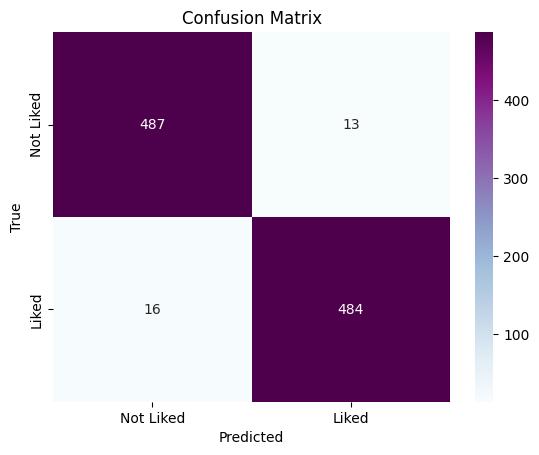

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming 'Liked' is your target variable and 'review_text_lemmatized' is the feature
X = dataset['review_text_lemmatized']
y_true = dataset['Liked']


# Create a CountVectorizer to convert text into numerical features
vectorizer = CountVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Train a simple Logistic Regression model (example)
model = LogisticRegression()
model.fit(X_vectorized, y_true)

# Predictions on the whole dataset
y_pred = model.predict(X_vectorized)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Display confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="BuPu", xticklabels=['Not Liked', 'Liked'], yticklabels=['Not Liked', 'Liked'])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()